
Name: Sahil Parmar

Task 5: EDA 3 (Exploratory Data Analysis)

Find the most successful team of IPL and players' and other factor's contribution behind the results.

In [1]:
#Import necessary Libraries

import pandas as pd
import numpy as np

In [2]:
#Importing first dataset "deliveries.csv"

df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deliveries.csv")
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
#Shape of Data 

df1.shape

(179078, 21)

In [4]:
#Columns present in the data

df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
#filling NaN values

df1.fillna("no", axis = 1, inplace = True)
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,no,no,no
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,no,no,no
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,no,no,no
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,no,no,no
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,no,no,no


In [6]:
#Top 5 wicket keepers who has more stumpings in IPL

wk_stumping = df1[df1["dismissal_kind"] == "stumped"]["fielder"].value_counts()
wk_stumping.head()

MS Dhoni      38
RV Uthappa    32
KD Karthik    29
WP Saha       18
PA Patel      16
Name: fielder, dtype: int64

In [7]:
#Leading Wicket Takers of IPL

bowler = df1[["bowler", "dismissal_kind"]]
bowler = bowler[(bowler.dismissal_kind.isin(["caught", "bowled", "caught_and_bowled", "stumped", "lbw"]))]
bowler = bowler.groupby("bowler").count()
bowler.rename(columns = {"dismissal_kind": "no_of_wickets"}, inplace = True)
bowler = bowler.sort_values(by = "no_of_wickets", ascending = False)
bowler.head()

,no_of_wickets
bowler,
SL Malinga,165
A Mishra,153
PP Chawla,145
Harbhajan Singh,139
DJ Bravo,139


In [8]:
#Leading Run Scorers of IPL

batsman = df1[["batsman", "batsman_runs"]]
batsman = batsman.groupby("batsman").count()
batsman.rename(columns = {"batsman_runs": "most_runs"}, inplace = True)
batsman = batsman.sort_values(by = "most_runs", ascending = False)
batsman.head()

,most_runs
batsman,
V Kohli,4211
SK Raina,4044
RG Sharma,3816
S Dhawan,3776
G Gambhir,3524


In [ ]:
#Most extra runs given by any team in IPL

extra = df1[["bowling_team", "extra_runs"]]
extra = extra.groupby("bowling_team").count()
extra.rename(columns = {"extra_runs": "most_extras"}, inplace = True)
extra = extra.sort_values(by = "most_extras", ascending = False)
extra

,most_extras
bowling_team,
Mumbai Indians,22517
Royal Challengers Bangalore,21236
Kolkata Knight Riders,20940
Kings XI Punjab,20782
Chennai Super Kings,19556
Delhi Daredevils,18725
Rajasthan Royals,17382
Sunrisers Hyderabad,12779
Deccan Chargers,9039


In [9]:
#Importing second dataset "matches.csv"

df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/matches.csv")
df2.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
#Shape of dataset

df2.shape

(756, 18)

In [12]:
#Removing nom-required values and columns

df2.drop(columns = ["umpire3"], axis = 1)
df2.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
#Columns after removing non-required columns

df2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [15]:
#Fill NaN values in remaining columns

df2.fillna("WU", axis = 1, inplace = True)

In [16]:
#Team wins by runs 

df2.groupby(["winner"])["win_by_runs"].value_counts()

winner               win_by_runs
Chennai Super Kings  0              48
                     13              3
                     18              3
                     24              3
                     38              3
                                    ..
Sunrisers Hyderabad  45              1
                     48              1
                     85              1
                     118             1
WU                   0               4
Name: win_by_runs, Length: 277, dtype: int64

In [17]:
#Team wins by wickets

df2.groupby(["winner"])["win_by_wickets"].value_counts()

winner               win_by_wickets
Chennai Super Kings  0                 52
                     5                 12
                     7                  9
                     6                  7
                     4                  6
                                       ..
Sunrisers Hyderabad  1                  1
                     3                  1
                     4                  1
                     10                 1
WU                   0                  4
Name: win_by_wickets, Length: 117, dtype: int64

In [18]:
#Creating a Dataframe that indicates wins by teams 

win  = df2["winner"].value_counts()
win

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
WU                               4
Name: winner, dtype: int64

In [19]:
win_df = pd.DataFrame(columns = ["Team", "Wins"])

for i in win.iteritems():
  temp_df2 = pd.DataFrame(
      {
          "Team": [i[0]],
          "Wins": [i[1]]
      }
  )
  win_df = win_df.append(temp_df2, ignore_index = True)  

win_df

,Team,Wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


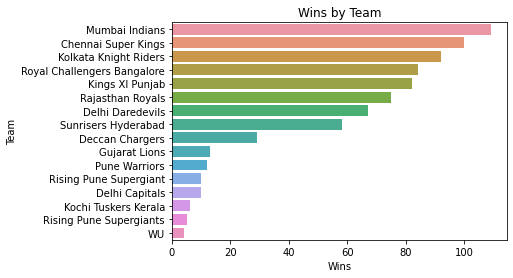

In [20]:
#Graph of team wins in IPL

import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Wins by Team")
plt.xlabel("Wins")
plt.ylabel("Team")
sns.barplot(x = "Wins", y = "Team", data = win_df)

In [22]:
#Data Frame of players who won most MOTM throughout in IPL

val_player = df2["player_of_match"].value_counts()
val_player

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
                  ..
S Aravind          1
AC Voges           1
A Zampa            1
SW Billings        1
S Gill             1
Name: player_of_match, Length: 227, dtype: int64

In [23]:
val_player_df = pd.DataFrame(columns = ["Player", "Wins"])

for i in val_player.iteritems():
    temp_df1 = pd.DataFrame(
        {
            "Player": [i[0]],
            "Wins": [i[1]]
        }
    )
    val_player_df = val_player_df.append(temp_df1, ignore_index = True)

val_player_df.head(10)

,Player,Wins
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,RG Sharma,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


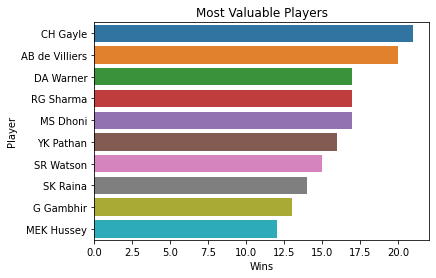

In [24]:
plt.title("Most Valuable Players")
sns.barplot(x = "Wins", y = "Player", data = val_player_df.head(10))

In [25]:
#The team who won toss most no. of times

toss_winner = df2["toss_winner"].value_counts()
toss_winner

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [26]:
toss_winner_df = pd.DataFrame(columns = ["Team", "Toss Wins"])

for i in toss_winner.iteritems():
  temp_df3 =  pd.DataFrame(
      {
          "Team": [i[0]],
          "Toss Wins": [i[1]]
      }
  )
  toss_winner_df = toss_winner_df.append(temp_df3, ignore_index = True)

toss_winner_df

,Team,Toss Wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


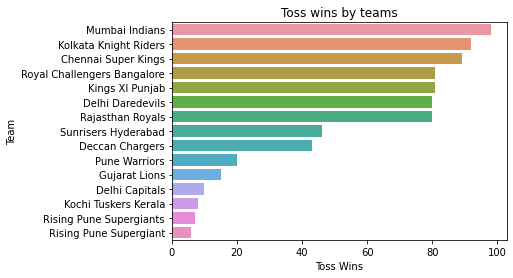

In [27]:
plt.title("Toss wins by teams")
sns.barplot(x = "Toss Wins", y = "Team", data = toss_winner_df)

In [28]:
defend = df2["win_by_runs"].value_counts()
defend.head()

0     419
14     13
4      11
10     11
1      10
Name: win_by_runs, dtype: int64

In [29]:
chase = df2["win_by_wickets"].value_counts()
chase.head()

0    350
6     85
7     80
5     71
8     54
Name: win_by_wickets, dtype: int64